Atualmente, sobretudo com o advento e a notável eficácia das técnicas de aprendizado profundo [[1]](#1), os modelos neuroinspirados se tornaram um paradigma importante dentro do campo de aprendizado de máquina. Assim, há cada vez mais interesse no estudo de modelos neurais para análise e tratamento de diversos problemas.

Esse post visa ser um tutorial prático e didático sobre redes neurais artificiais e sua implementação utilizando a linguagem de programação python com a biblioteca numpy.

Este tutorial está longe de tentar ser exaustivo e visa expor um primeiro contato com o tema de uma forma que é clara, didática e ao mesmo tempo interessante segundo a minha própria opinião e vivência. Para seguir este tutorial, levo em conta que você já teve algum contato com a linguagem de programação [python](https://www.python.org/). No fim do post tem um pequeno tutorial de numpy para quem nunca utilizou a biblioteca.

In [1]:
import numpy as np

Para que os resultados do post possam ser reproduzidos com os mesmos valores, vamos inicializar o gerador de números pesudo-aleatórios do numpy com um valor de semente específico, no caso 1.

In [2]:
np.random.seed(1)

## Introdução aos conceitos de aprendizado e de redes neurais artificiais

Uma dificuldade nas áreas de inteligência artificial é a de estabelecer significados mais fixos para palavras como consciência, inteligência e aprendizagem. Como podemos dizer que um algoritmo aprende?

Uma forma de definir aprendizado (presente em [[2]](#2)) é dizer que um modelo aprende uma *tarefa* se tem uma *performance* melhorada ao passo que é exposto a uma *experiência*. Assim, para fazer um modelo capaz de aprender a resolver uma tarefa específica, precisamos definir:

1. um **modelo** que resolve a tarefa
2. uma forma de melhorar o desempenho do modelo na tarefa (**algoritmo de aprendizado**)
3. um **métrica de performance** para avaliá-lo na tarefa

### Modelo: perceptron

<center><figure class="image">
  <img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png" alt="Neurônio">
    <figcaption>Figura retirada de: https://en.wikipedia.org/wiki/File:Neuron3.png</figcaption>
</figure></center>

Redes neurais artificiais (*artificial neural networks*, ANN) são sistemas de computação não lineares e adaptativos originalmente inspirados nas redes neurais biológicas presentes no sistema nervoso dos animais. Em outras palavras, uma rede neural é um modelo que mapeia entradas para saídas de uma forma não linear e que aprende com o tempo (exposição). Assim, esse mapeamento é o problema a ser resolvido por um modelo neural.

Por exemplo, para mapear a função "ou" (operador lógico de disjunção inclusiva $\lor$) diríamos que as entradas são dois valores booleanos a e b e queremos mapear a saída $y = f(x_1, x_2) = x_1 \lor x_2$. O objetivo do nosso modelo é aprender a função $f(x_1, x_2)$.

|   |   | |
|-----|-----|---|
| **x1** | **x2** | **y** |
| 0   | 0   | 0 |
| 0   | 1   | 1 |
| 1   | 0   | 1 |
| 1   | 1   | 1 |

Essas redes são geralmente representadas como neurônios (unidades mínimas de computação) ligadas por arestas (pesos que parametrizam a função a ser mapeada). Assim, uma rede neural típica possui uma camada de entrada, uma camada de saída e opcionalmente uma ou mais camadas intermediárias:

![Rede Neural Artificial](../../images/ann.png)

Os neurônios são unidades de computação que podem ser ligados entre si formando uma rede computacional. A figura acima mostra uma rede com 3 entradas, 5 neurônios na camada intermediária e 1 neurônio na camada de saída. Note que os círculos nas entradas não são neurônios, apenas valores numéricos de entrada. A "rede" mais simples possível implementada, é uma rede contendo apenas um neurônio (1 camada de entrada e uma camada de saída), como por exemplo a figura a seguir:

![Neurônio](../../images/neuronio.png)

A figura acima mostra um neurônio do tipo perceptron [[3]](#2) modificado com uma função de ativação genérica que ainda é um dos neurônios mais utilizados até hoje. Ele pode ser visto como uma combinação linear ponderada das n entradas (mais um termo constante ponderado por $w_0$ que chamamos de viés ou *bias*) e uma posterior ativação utilizando uma função não-linear $f(\cdot)$:

$$
    \hat{y} = f(w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + w_0) = f\left ( w_0 + \sum\limits_{i = 1}^n w_i \cdot x_i \right )
$$

Para facilitar o cálculo computacional, todas as contas são feitas de forma matricial nos algoritmos, assim, podemos reescrever o modelo acima como um produto interno entre vetores:

$$
\hat{y} = f(\mathbf{x}^T\mathbf{w})
$$

em que o vetor de pesos $\mathbf{w}$ e o vetor de entrada $\mathbf{x}$ são representados como vetores coluna e o viés $w_0$ é incorporado ao vetor de pesos:

$$\mathbf{w} = [w_0 \enspace w_1 \enspace w_2 \enspace... \enspace w_n]^T \quad \text{e} \quad \mathbf{x} = [1 \enspace x_1 \enspace x_2 \enspace ... \enspace x_n]^T$$

Para agilizar ainda mais os cálculos, podemos empilhar vários exemplos numa matriz $\mathbf{X}$ e gerar várias saídas de uma só vez (vetor $\mathbf{\hat{y}}$). Assim, podemos escrever um modelo que opera sobre $m$ vetores de entrada, da seguinte maneira:

$$
\mathbf{\hat{y}} = f(\mathbf{X}\cdot\mathbf{w})
$$

Onde:

$$
\mathbf{X} =
\begin{bmatrix}
\mathbf{x_1} \\
\mathbf{x_2} \\
\vdots \\
\mathbf{x_m}
\end{bmatrix}
=
\begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & \cdots & x_{1, n} \\
    1 & x_{2,1} & x_{2,2} & \cdots & x_{2, n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m,1} & x_{m,2} & \cdots & x_{m, n} \\
\end{bmatrix}_{~\text{m x (n + 1)}}
$$

E então:

$$
\mathbf{\hat{y}} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
    f(\mathbf{x_1}^T\mathbf{w}) \\
    f(\mathbf{x_2}^T\mathbf{w}) \\
    \vdots \\
    f(\mathbf{x_m}^T\mathbf{w})
\end{bmatrix}_{~\text{m x 1}}
$$

Em que $x_{i,j}$ representa a característica $j$ do exemplo $i$.

In [3]:
# Dados de exemplo:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
X = np.hstack((np.ones((4, 1), np.int), X)) # Adicionar a coluna de 1
              
y = np.array([[0], [1], [1], [1]])
              
print(f'X:\n{X}\ny:\n{y}')

X:
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
y:
[[0]
 [1]
 [1]
 [1]]


A função de ativação $f(\cdot)$ pode variar, mas tipicamente são usadas curvas sigmoides (função logística ou tanh) por serem bem comportadas (tem sua saída limitada entre valores fixos). Algumas outras funções muito utilizadas são a função softmax para modelar distribuições de probabilidade e a função afim retificada que se mostrou uma boa função para o aprendizado em redes profundas.

![Funções de ativação](../../images/activation.png)

Voltando ao nosso exemplo, queremos achar uma forma de representar a função soma da seguinte maneira:

$$\hat{y} = f(\mathbf{x}^T \mathbf{w}) = f(w_1\cdot x_1 + w_2\cdot x_2 + w_0)$$

No caso da função de exemplo, usaremos uma função logistica $g(\cdot)$ como ativação. Ela e sua derivada (que será utilizada posteriormente) podem ser definidas como:

$$
g(z) = \frac{1}{1 + e^{-z}} \qquad g'(z) = \frac{dg(z)}{dz} = g(z) \cdot (1 - g(z))
$$

In [4]:
def g(z):
    return 1/(1 + np.exp(-z))

In [5]:
def g_prime(z):
    return g(z) * (1 - g(z))

In [6]:
def neural_net(X, w):
    return g(np.dot(X, w))

Note que, como só há uma camada de neurônios, o modelo ainda não é capaz de realizar mapeamentos não-lineares e a função de ativação só serve para limitar os valores de saída. Da forma como está, nosso modelo é um regressor logístico [[4]](#4). No próximo post, implementaremos uma rede com mais camadas e ficará evidente a necessidade de funções de ativação não-lineares.

Desta forma, podemos conferir que se utilizarmos os pesos -5, 10 e 10 respectivamente, teremos um mapeamento muito bom da função que tentamos mapear:

$$
y = g(\mathbf{x}^T \cdot \left [-5 \enspace 10 \enspace 10 \right ]^T) = g(-5 +  10\cdot x_1 + 10\cdot x_2)
$$

| | | |
|-----|-----|---|
|  **x1** |  **x2** | **y** |
| 0   | 0   | 0.007 |
| 0   | 1   | 0.993 |
| 1   | 0   | 0.993 |
| 1   | 1   | 1.000 |

In [7]:
w = np.array([[-5], [10], [10]]); w

array([[-5],
       [10],
       [10]])

In [8]:
neural_net(X, w)

array([[0.00669285],
       [0.99330715],
       [0.99330715],
       [0.99999969]])

Mas como descobrir os valores de $\mathbf{w}$ que adequam o modelo à função a ser mapeada?

### Algoritmo de aprendizado: otimização de primeira ordem (gradiente descendente)

Finalmente, para que nosso modelo aprenda, temos que descobrir que pesos são adequados para mapear a função desejada.

Trataremos nosso problema como um problema de otimização, onde desejamos encontrar os pesos $\mathbf{w}$ que vão minimizar o erro da nossa função de custo. Podemos escrever isso da seguinte forma:

$$
\mathbf{w} = \arg\min_{\mathbf{w}} ~ J
$$

#### Função de custo: erro quadrático médio

A proposta do erro quadrático médio (*mean squared error*, MSE) é medir de alguma forma se estamos chegando mais perto do resultado esperado ou não, independente se para mais ou para menos (e, por isso, o quadrado):

$$
\text{MSE} = \frac{1}{m}\sum_{i=0}^m(y_i - \hat{y}_i)^2
$$

em que $y$ é a saída esperada e $\hat{y}$ é a saída estimada pelo modelo.

Para vetorizar essa equação, podemos definir um vetor de erros:

$$\mathbf{e} = \mathbf{y} - \mathbf{\hat{y}}$$

E então:

$$
J = \text{MSE} = \frac{\mathbf{e}^T\mathbf{e}}{N}
$$

In [9]:
def mse(y, y_hat):
    e = y - y_hat
    return np.dot(e.T, e)/e.shape[0]

#### Otimizador: gradiente descendente

Para resolver o problema de otimização usaremos um método iterativo de primeira ordem chamado gradiente descendente  que consiste em inicializar os pesos sinápticos aleatoriamente e ir progressivamente atualizando na direção oposta do vetor gradiente $\nabla{J} = \frac{dJ}{d\mathbf{w}}$. A intuição por trás disso está em que o vetor gradiente aponta sempre para o sentido de maior crescimento da função, logo, seu negativo apontaria para uma região da função com valor mais baixo, e portanto para valores de pesos que fazem com que o modelo tenha menor erro.

O gradiente descendente pode ser implementado da seguinte forma:

1 - inicializa-se os pesos aleatoriamente

2 - avalia-se o erro do modelo na função de custo para um exemplo

3 - calcula-se o vetor gradiente

4 - atualiza-se os pesos

5 - volta-se para o passo 2 utilizando o próximo exemplo

A regra de atualização de pesos é a seguinte:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \cdot \nabla{J}
$$
com:
$$
\nabla{J} = \left [ \frac{\partial{J}}{\partial{w_0}} ~ \frac{\partial{J}}{\partial{w_1}} \cdots \frac{\partial{J}}{\partial{w_n}} \right ]^T
$$

Em que $\alpha$ determina a velocidade de aprendizado (quão grandes serão os saltos em direção contrária ao vetor gradiente).

No caso da nossa rede de único neurônio, podemos ver que - usando a regra da cadeia - chegamos em:
$$
\frac{\partial{J}}{\partial{w_n}} = \frac{dJ}{de}\frac{de}{d\hat{y}}\frac{\partial{\hat{y}}}{\partial{w_n}}
$$
Com:
$$\quad \frac{dJ}{de} = 2e\text{,}\quad\frac{de}{d\hat{y}} = -1\quad\text{e}\quad\frac{\partial{\hat{y}}}{\partial{w_n}} = g'(w_n\cdot x_n) \cdot x_n$$

Ou seja:
$$
J' = \frac{\partial{J}}{\partial{w_n}} = -2 e \cdot g'(w_n\cdot x_n) \cdot x_n
$$

De forma vetorizada:
$$
J'_{\text{((n+1)x1)}} = \frac{d{J}}{d{\mathbf{w}}} = -2 e \cdot g'(\mathbf{x}^T\mathbf{w}) \cdot \mathbf{x}
$$

Englobando vários exemplos de uma só vez:
$$
J'_{\text{((n+1)x1)}} = \frac{d{J}}{d{\mathbf{w}}} = -2 \mathbf{X}^T  \cdot  \mathbf{e} \odot g'(\mathbf{Xw})
$$

Em que $\odot$ (produto Hadammard) é uma multiplicação elemento-a-elemento:

$$
    \mathbf{a} \odot \mathbf{b} = a_i \cdot b_i = [a_1\cdot b_1 \quad a_2\cdot b_2 \quad \cdots \quad a_n \cdot b_n]^T
$$

In [10]:
def gradient(y, y_hat, X, w):
    return -2 * np.dot(X.T, np.multiply((y - y_hat), g_prime(np.dot(X,w))))

In [11]:
def update_weights(w, X, y, y_hat, alpha):
    return w - alpha*gradient(y, y_hat, X, w)

### Métrica de performance: acurácia

A métrica de performance mais simples e intuitiva é a acurácia - medida de quantos exemplos foram classificados corretamente em relação ao número total de exemplos avaliados.

Podemos definir a acurácia assim:

$$
    P = \frac{\text{n. de exemplos corretamente classificados}}{\text{n. total de exemplos}}
$$

In [12]:
def accuracy(y, y_hat):
    return np.sum(np.equal(y, y_hat))/y.shape[0]

Exemplo:

In [13]:
accuracy(np.array([[1], [0]]), np.array([[1], [1]]))

0.5

## Implementação de um classificador binário usando o modelo perceptron

### Geração de dados para fins didáticos

O nosso exemplo do operador OR foi útil para mostrar como funciona o vetor de pesos, mas não é tão útil para mostrar o processo de aprendizado da rede. Em geral redes neurais são usadas para mapeamentos mais complexos em que não é prático a modelagem por meio de regras manufaturadas. De fato, qualquer algoritmo de aprendizado de máquina se torna mais útil quanto mais dados o problema envolve. Assim, usaremos um exemplo com mais dados para mostrar o processo de aprendizado da rede neural.

Existem diversos datasets simples de classificação binária que podem ser testados usando o modelo que implementaremos (indicados no fim do post), mas para fins didáticos vamos gerar dados de duas distribuições de probabilidade diferentes e nosso problema será classificar se a amostra é positiva (referente à primeira distribuição) ou negativa (referente à segunda distribuição)

Não se preocupe se não entender o código abaixo perfeitamente, o importante é apenas entender que vamos ter exemplos vindos de duas distribuições diferentes e nossa tarefa será classificar de qual distribuição cada amostra veio

In [14]:
M = 200 # Número de exemplos de treino
N = 2    # Número de características

# Geração de exemplos positivos (classe 1 - média (1, 2), variância 1)
data_pos = np.random.normal([2, 1], [1], [M//2,2])
data_pos = np.hstack([data_pos, np.ones([M//2, 1])])

# Geração de exemplos negativos (classe 0 - média (0, -1), variância 1.2)
data_neg = np.random.normal([-1, 1], [1.2], [M//2,2])
data_neg = np.hstack([data_neg, np.zeros([M//2, 1])])

# Adicionar coluna de 1 e embaralhar
data = np.vstack([data_pos, data_neg])
data = np.hstack([np.ones([M,1]), data])
np.random.shuffle(data)
X, y = np.hsplit(data, [N+1])

# Alguns exemplos
print("    x1    |     x2    |     y    ")
for i in range(5):
    print("%9.4f | %9.4f | %9.4f" % (X[i,1], X[i,2], y[i,0]))

    x1    |     x2    |     y    
   2.8390 |    1.9311 |    1.0000
  -1.0424 |    3.5327 |    0.0000
  -0.4092 |    0.1832 |    0.0000
  -0.8391 |    2.4425 |    0.0000
  -3.3320 |    1.4230 |    0.0000


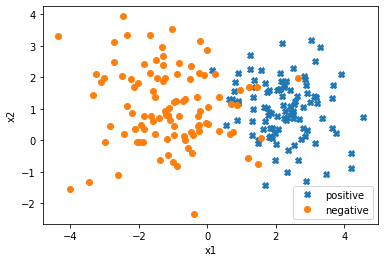

In [15]:
import matplotlib.pyplot as plt
plt.plot(data_pos[:,0], data_pos[:,1], 'X'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(data_neg[:,0], data_neg[:,1], 'o'), plt.xlabel('x1'), plt.ylabel('x2')
plt.legend(['positive', 'negative'])
plt.show()

### Implementação do classificador

Vamos começar inicializando nossos pesos:

In [16]:
w = np.random.random((N+1, 1))
print(f'w:\n{w}')

w:
[[0.98075878]
 [0.68656318]
 [0.91994723]]


Vamos testar se a rede está funcionando, testando nos primeiros 5 exemplos:

In [17]:
y_hat = neural_net(X, w)
print(f'y_hat:\n{y_hat[:5]}')

y_hat:
[[0.9910438 ]
 [0.97111096]
 [0.70440047]
 [0.93410796]
 [0.50055428]]


O valor ainda não tem sentido, mas podemos ver que a rede consegue receber 5 exemplos e gerar 5 saídas utilizando o vetor de pesos. A barreira representada pelo vetor inicializado aleatoriamente é a seguinte:

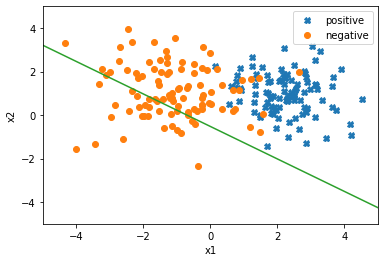

In [18]:
axis_x = np.linspace(-5, 5, 100)
plt.plot(data_pos[:,0], data_pos[:,1], 'X'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(data_neg[:,0], data_neg[:,1], 'o'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(axis_x, (0.5-w[0]-(w[1]*axis_x))/w[2])
plt.legend(['positive', 'negative'])
plt.axis((-5,5,-5,5))
plt.show()

Para calcular a acurácia do modelo, vamos primeiro arredondar os valores do modelo para as classes possíveis (0, 1):

In [19]:
pred = np.round(y_hat)
y_hat[:5], pred[:5]

(array([[0.9910438 ],
        [0.97111096],
        [0.70440047],
        [0.93410796],
        [0.50055428]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [20]:
print(f'Acurácia: {accuracy(y, pred):.4f}')

Acurácia: 0.5750


Vamos ver o que acontece se fizermos um passo da nossa iteração de otimização:

In [21]:
w = update_weights(w, X, y, y_hat, 0.01)
y_hat = neural_net(X, w)
pred = np.round(y_hat)

In [22]:
axis_x = np.linspace(-5, 5, 100)
plt.plot(data_pos[:,0], data_pos[:,1], 'X'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(data_neg[:,0], data_neg[:,1], 'o'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(axis_x, (0.5-w[0]-(w[1]*axis_x))/w[2])
plt.legend(['positive', 'negative'])
plt.axis((-5,5,-5,5))
plt.show()

In [23]:
print(f'Acurácia: {accuracy(y, pred):.4f}')

Acurácia: 0.6650


Se repetirmos essas operações vezes o suficiente (treinar o modelo por 100 épocas) essa barreira deve se ajustar:

In [24]:
for epoch in range(100):
    y_hat = neural_net(X, w)
    w = update_weights(w, X, y, y_hat, 0.01)
    pred = np.round(y_hat)

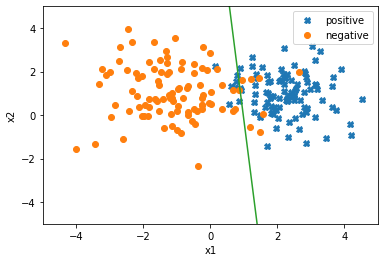

In [25]:
axis_x = np.linspace(-5, 5, 100)
plt.plot(data_pos[:,0], data_pos[:,1], 'X'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(data_neg[:,0], data_neg[:,1], 'o'), plt.xlabel('x1'), plt.ylabel('x2')
plt.plot(axis_x, (0.5-w[0]-(w[1]*axis_x))/w[2])
plt.legend(['positive', 'negative'])
plt.axis((-5,5,-5,5))
plt.show()

In [26]:
print(f'Acurácia: {accuracy(y, pred):.4f}')

Acurácia: 0.9400


## Outros datasets para treinar classificação binária

Você pode usar o mesmo modelo que criamos para resolver uma infinidade de problemas. Nenhuma função precisa ser mudada, a única coisa que provavelmente mudará é a dimensão do vetor de pesos w, pois depende do número de entradas de cada problema. Segue abaixo alguns exemplos:

  - 1 [Classificação de papel-moeda (detecção de fraude)](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
  - 2 [Classificação pedra/mina](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks%29)

## Apêndice: conhecendo o numpy

O [numpy](https://numpy.org/) é uma biblioteca muito poderosa e amplamente utilizada para computação numérica em linguagem python, felizmente a maioria dos comandos são bastante intuitivos e será simples entender o uso da biblioteca neste tutorial.

In [27]:
import numpy as np

Vamos determinar uma semente específica para a geração de números pseudoaleatórios para que os resultados sejam reprodutíveis:

In [28]:
np.random.seed(1)

A principal vantagem de utilizar o numpy ao invés de python puro é a possibilidade de trabalhar com arrays (semelhante a vetores em C - [vetor x lista](https://www.quora.com/What-is-the-difference-between-an-ARRAY-and-a-LIST)), assim aumentando a performance dos calculos numéricos.

In [29]:
# Declaração explícita de um array unidimensional (1D) usando numpy
a = np.array([1, 2, 3, 4, 5, 6]); a

array([1, 2, 3, 4, 5, 6])

In [30]:
# Declaração de uma matriz bidimensional (2D) usando numpy
M = np.array([[0, 1, 3], [4, 5, 6]]); M

array([[0, 1, 3],
       [4, 5, 6]])

In [31]:
# Método para acessar dimensões de arrays
a.shape, M.shape

((6,), (2, 3))

Algumas outras operações importantes no contexto de redes neurais:

In [32]:
# Transposição de matriz
M.T

array([[0, 4],
       [1, 5],
       [3, 6]])

In [33]:
# Gerar um array (1D) com valores aleatórios entre 0 e 1
rand = np.random.random(6); rand

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411])

In [34]:
# Gerar um array (1D) com valores sequenciais
N = np.arange(6); N

array([0, 1, 2, 3, 4, 5])

In [35]:
# Mudar as dimensões de um array
N = N.reshape(3, 2); N

array([[0, 1],
       [2, 3],
       [4, 5]])

Note que, rigorosamente, podemos criar vetor coluna (2D) ou vetor linha (2D) usando o comando acima, mas em geral podemos trabalhar com arrays unidimensionais ([1d vs 2d arrays](https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r)):

In [36]:
# Vetor linha (2D) e vetor coluna (2D)
a.reshape(1, 6), a.reshape(6, 1)

(array([[1, 2, 3, 4, 5, 6]]),
 array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]))

In [37]:
# Multiplicação matricial
np.dot(N, M)

array([[ 4,  5,  6],
       [12, 17, 24],
       [20, 29, 42]])

In [38]:
# Produto interno
np.dot(rand, a)

11.960653771969142

In [39]:
# Produto elemento a elemento
np.multiply(M.T, N)

array([[ 0,  4],
       [ 2, 15],
       [12, 30]])

Para conhecer mais sobre a biblioteca, existe um tutorial oficial [neste link](https://numpy.org/devdocs/user/quickstart.html).

## Referências

<a id='1'></a>
[[1] LECUN, Yann; BENGIO, Yoshua; HINTON, Geoffrey. Deep learning. *nature*, v. 521, n. 7553, p. 436-444, 2015.](https://s3.us-east-2.amazonaws.com/hkg-website-assets/static/pages/files/DeepLearning.pdf)

<a id='2'></a>
[[2] GOODFELLOW, Ian; BENGIO, Yoshua; COURVILLE, Aaron. Deep learning. MIT press, 2016.](https://www.deeplearningbook.org/)

<a id='3'></a>
[[3] WIKIPEDIA, Perceptron.](https://pt.wikipedia.org/wiki/Perceptron)

<a id='4'></a>
[[4] WIKIPEDIA, Regressão logística.](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica)